In [1]:
#Parte A. Enfoque de validación

In [3]:
import pandas as pd
import numpy as np

In [5]:
# 2004 - formato Stata
df_2004 = pd.read_stata(r"C:\Users\Gustavo\Documents\GitHub\BigDataUBA-Grupo26\TP 4\t104_dta\Individual_t104.dta")

# 2024 - formato Excel
df_2024 = pd.read_excel(r"C:\Users\Gustavo\Documents\GitHub\BigDataUBA-Grupo26\TP 4\EPH_usu_1_Trim_2024_xls\EPH_usu_1er_Trim_2024_xlsx\usu_individual_T124.xlsx")

In [7]:
# Renombrar columnas en df_2004
df_2004 = df_2004.rename(columns={
    'ch06': 'edad',
    'nivel_ed': 'educ',
    'ch04': 'sexo',
    'estado': 'condicion_empleo',
    'p21': 'salario_semanal'
})

# Seleccionar solo las columnas necesarias
variables = ['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal']
df_2004 = df_2004[variables]
# Renombrar columnas en df_2024 para que coincidan con los nombres usados en df_2004
df_2024 = df_2024.rename(columns={
    'CH06': 'edad',
    'NIVEL_ED': 'educ',
    'CH04': 'sexo',
    'ESTADO': 'condicion_empleo',
    'P21': 'salario_semanal'
})

variables = ['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal']
df_2024 = df_2024[variables]

In [9]:
print(df_2004.head())

   edad                             educ   sexo condicion_empleo  \
0  79.0            Secundaria Incompleta  Varón         Inactivo   
1  67.0                Primaria Completa  Mujer          Ocupado   
2  74.0                Primaria Completa  Mujer         Inactivo   
3  54.0                Primaria Completa  Varón          Ocupado   
4  51.0  Superior Universitaria Completa  Mujer         Inactivo   

   salario_semanal  
0              0.0  
1              0.0  
2              0.0  
3           2000.0  
4              0.0  


In [13]:
print(df_2024.head())

   edad  educ  sexo  condicion_empleo  salario_semanal
0    44     3     2                 1               -9
1    22     5     2                 3                0
2     3     7     2                 4                0
3    54     4     1                 1           250000
4    53     4     2                 1           200000


In [23]:
[col for col in df_2004.columns if 'condicion' in col.lower() or 'actividad' in col.lower()]

['condicion_empleo']

In [25]:
cols = [col for col in df_2004.columns if 'condicion' in col.lower() or 'actividad' in col.lower()]
print(df_2004[cols].head())

  condicion_empleo
0         Inactivo
1          Ocupado
2         Inactivo
3          Ocupado
4         Inactivo


In [27]:
print(df_2004['condicion_empleo'].unique())

['Inactivo', 'Ocupado', 'Desocupado', 'Menor de 10 años', 'Entrevista individual no realizada (no respue...]
Categories (5, object): ['Entrevista individual no realizada (no respue... < 'Ocupado' < 'Desocupado' < 'Inactivo' < 'Menor de 10 años']


In [29]:
df_2004['desocupado'] = df_2004['condicion_empleo'].apply(lambda x: 1 if x == 'Desocupado' else 0)
df_2024['desocupado'] = df_2024['condicion_empleo'].apply(lambda x: 1 if x == 'Desocupado' else 0)

In [15]:
print("Valores únicos en df_2004['condicion_empleo']:")
print(df_2004['condicion_empleo'].unique())

print("\nValores únicos en df_2024['condicion_empleo']:")
print(df_2024['condicion_empleo'].unique())

Valores únicos en df_2004['condicion_empleo']:
['Inactivo', 'Ocupado', 'Desocupado', 'Menor de 10 años', 'Entrevista individual no realizada (no respue...]
Categories (5, object): ['Entrevista individual no realizada (no respue... < 'Ocupado' < 'Desocupado' < 'Inactivo' < 'Menor de 10 años']

Valores únicos en df_2024['condicion_empleo']:
[1 3 4 2 0]


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Variables independientes que querés usar (ejemplo, ajustá según tus variables)
variables_indep = ['edad', 'educ', 'sexo', 'salario_semanal']

def preparar_X_num(df, vars_indep):
    X = df[vars_indep].copy()
    for col in X.select_dtypes(include=['category', 'object']).columns:
        X[col] = X[col].astype('category').cat.codes
    X['const'] = 1
    return X

# Preparar X e y para 2004
X_2004 = preparar_X_num(df_2004, variables_indep)
y_2004 = df_2004['desocupado']

# Split 2004
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(
    X_2004, y_2004, test_size=0.3, random_state=444)

train_2004 = X_train_2004.copy()
train_2004['desocupado'] = y_train_2004
test_2004 = X_test_2004.copy()
test_2004['desocupado'] = y_test_2004

diff_medias_2004 = pd.DataFrame({
    'media_train': train_2004[variables_indep].mean(),
    'media_test': test_2004[variables_indep].mean()
})
diff_medias_2004['diferencia'] = diff_medias_2004['media_train'] - diff_medias_2004['media_test']

print("Diferencia de medias entre train y test para 2004:")
print(diff_medias_2004)

# Preparar X e y para 2024
X_2024 = preparar_X_num(df_2024, variables_indep)
y_2024 = df_2024['desocupado']

# Split 2024
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(
    X_2024, y_2024, test_size=0.3, random_state=444)

train_2024 = X_train_2024.copy()
train_2024['desocupado'] = y_train_2024
test_2024 = X_test_2024.copy()
test_2024['desocupado'] = y_test_2024

diff_medias_2024 = pd.DataFrame({
    'media_train': train_2024[variables_indep].mean(),
    'media_test': test_2024[variables_indep].mean()
})
diff_medias_2024['diferencia'] = diff_medias_2024['media_train'] - diff_medias_2024['media_test']

print("\nDiferencia de medias entre train y test para 2024:")
print(diff_medias_2024)

Diferencia de medias entre train y test para 2004:
                 media_train  media_test  diferencia
edad               31.300612   31.522558   -0.221946
educ                2.401710    2.403400   -0.001691
sexo                0.524163    0.521086    0.003076
salario_semanal   196.206422  195.092000    1.114423

Diferencia de medias entre train y test para 2024:
                   media_train     media_test   diferencia
edad                 36.355824      36.147738     0.208086
educ                  3.751450       3.731813     0.019637
sexo                  1.521793       1.515092     0.006701
salario_semanal  110175.317729  108044.356279  2130.961450


In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que diff_medias_2004 y diff_medias_2024 son tus DataFrames

# Primero creamos un DataFrame para cada año:
diff_medias_2004 = pd.DataFrame({
    'media_train': [31.300612, 2.401710, 0.524163, 196.206422],
    'media_test': [31.522558, 2.403400, 0.521086, 195.092000],
    'diferencia': [-0.221946, -0.001691, 0.003076, 1.114423]
}, index=['edad', 'educ', 'sexo', 'salario_semanal'])

diff_medias_2024 = pd.DataFrame({
    'media_train': [36.355824, 3.751450, 1.521793, 110175.317729],
    'media_test': [36.147738, 3.731813, 1.515092, 108044.356279],
    'diferencia': [0.208086, 0.019637, 0.006701, 2130.961450]
}, index=['edad', 'educ', 'sexo', 'salario_semanal'])

def save_table_as_image(df, filename):
    fig, ax = plt.subplots(figsize=(8, 2)) # Ajusta tamaño si querés
    ax.axis('off')
    tabla = ax.table(cellText=df.round(6).values,
                     colLabels=df.columns,
                     rowLabels=df.index,
                     cellLoc='center',
                     loc='center')
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.auto_set_column_width([0,1,2,3])
    plt.savefig(filename, bbox_inches='tight')
    plt.close()

# Guardar ambas tablas como imagen PNG
save_table_as_image(diff_medias_2004, 'diff_medias_2004.png')
save_table_as_image(diff_medias_2024, 'diff_medias_2024.png')

In [19]:
df_2004 = df_2004.rename(columns={'ESTADO_ACTIVIDAD_2004': 'condicion_actividad'})
df_2024 = df_2024.rename(columns={'ESTADO_ACTIVIDAD_2024': 'condicion_actividad'})

In [21]:
print(df_2004.columns)
print(df_2024.columns)


Index(['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal'], dtype='object')
Index(['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal'], dtype='object')


In [27]:
print(df_2004_original.columns)
print(df_2024_original.columns)

NameError: name 'df_2004_original' is not defined

In [31]:
df_2004 = pd.read_stata(r"C:\Users\Gustavo\Documents\GitHub\BigDataUBA-Grupo26\TP 4\t104_dta\Individual_t104.dta")
df_2024 = pd.read_excel(r"C:\Users\Gustavo\Documents\GitHub\BigDataUBA-Grupo26\TP 4\EPH_usu_1_Trim_2024_xls\EPH_usu_1er_Trim_2024_xlsx\usu_individual_T124.xlsx")

In [33]:
print(df_2004.columns)
print(df_2024.columns)

Index(['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)
Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)


In [35]:
# Pasar todos los nombres de columnas a minúsculas
df_2004.columns = df_2004.columns.str.lower()
df_2024.columns = df_2024.columns.str.lower()

# Renombrar columnas clave para que coincidan (asegurate de poner el nombre correcto de cada año)
df_2004 = df_2004.rename(columns={
    'ch06': 'edad',
    'nivel_ed': 'educ',
    'ch04': 'sexo',
    'cat_ocup': 'condicion_empleo',
    'p21': 'salario_semanal'
})

df_2024 = df_2024.rename(columns={
    'ch06': 'edad',          # o 'ch06' o 'ch06' según el dataset, verificá cuál es
    'nivel_ed': 'educ',      # adaptá el nombre correcto
    'ch04': 'sexo',
    'cat_ocup': 'condicion_empleo',
    'p21': 'salario_semanal'
})

# Definir las columnas que querés usar
variables = ['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal']

# Seleccionar solo esas columnas en cada dataframe
df_2004 = df_2004[variables]
df_2024 = df_2024[variables]

In [37]:
# Pasar todas las columnas a minúsculas
df_2004.columns = df_2004.columns.str.lower()
df_2024.columns = df_2024.columns.str.lower()

# Mostrar las columnas de cada dataframe para que verifiques los nombres exactos
print("Columnas df_2004:")
print(df_2004.columns.to_list())

print("\nColumnas df_2024:")
print(df_2024.columns.to_list())

Columnas df_2004:
['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal']

Columnas df_2024:
['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal']


In [39]:
print([col for col in df_2004.columns if 'cond' in col or 'act' in col])
print([col for col in df_2024.columns if 'cond' in col or 'act' in col])

['condicion_empleo']
['condicion_empleo']


In [41]:
print(df_2004['condicion_empleo'].head(10))
print(df_2024['condicion_empleo'].head(10))

0              0.0
1    Cuenta propia
2              0.0
3    Cuenta propia
4              0.0
5    Cuenta propia
6    Cuenta propia
7    Cuenta propia
8              0.0
9              0.0
Name: condicion_empleo, dtype: category
Categories (5, object): [0.0 < 'Patrón' < 'Cuenta propia' < 'Obrero o empleado' < 'Trabajador familiar sin remuneración']
0    3
1    0
2    0
3    3
4    3
5    3
6    3
7    0
8    3
9    3
Name: condicion_empleo, dtype: int64


In [43]:
# Mostrar columnas que pueden tener "condicion" o "actividad" en su nombre, para buscar algo parecido
print([col for col in df_2004.columns if 'condicion' in col.lower() or 'actividad' in col.lower()])
print([col for col in df_2024.columns if 'condicion' in col.lower() or 'actividad' in col.lower()])

['condicion_empleo']
['condicion_empleo']


In [45]:
print(df_2004.head())
print(df_2024.head())

   edad                             educ   sexo condicion_empleo  \
0  79.0            Secundaria Incompleta  Varón              0.0   
1  67.0                Primaria Completa  Mujer    Cuenta propia   
2  74.0                Primaria Completa  Mujer              0.0   
3  54.0                Primaria Completa  Varón    Cuenta propia   
4  51.0  Superior Universitaria Completa  Mujer              0.0   

   salario_semanal  
0              0.0  
1              0.0  
2              0.0  
3           2000.0  
4              0.0  
   edad  educ  sexo  condicion_empleo  salario_semanal
0    44     3     2                 3               -9
1    22     5     2                 0                0
2     3     7     2                 0                0
3    54     4     1                 3           250000
4    53     4     2                 3           200000


In [23]:
def crear_desocupado(df):
    # Asumiendo que la variable con estado de actividad se llama 'condicion_actividad'
    df = df.copy()
    df['desocupado'] = df['condicion_actividad'].apply(lambda x: 1 if x == 2 else 0)
    return df

df_2004 = crear_desocupado(df_2004)
df_2024 = crear_desocupado(df_2024)

KeyError: 'condicion_actividad'

In [15]:
# Renombrar columnas en df_2004
df_2004 = df_2004.rename(columns={
    'ch03': 'edad',
    'nivel_ed': 'educ',
    'ch04': 'sexo',
    'cat_ocup': 'condicion_empleo',
    'p21': 'salario_semanal'
})

# Renombrar columnas en df_2024
df_2024 = df_2024.rename(columns={
    'CH03': 'edad',
    'NIVEL_ED': 'educ',
    'CH04': 'sexo',
    'CAT_OCUP': 'condicion_empleo',
    'P21': 'salario_semanal'
})

# Variables que vamos a usar
variables = ['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal']

# Seleccionar columnas para cada dataframe
df_2004 = df_2004[variables]
df_2024 = df_2024[variables]

# Mostrar columnas para verificar
print("Columnas df_2004:", df_2004.columns.tolist())
print("Columnas df_2024:", df_2024.columns.tolist())

Columnas df_2004: ['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal']
Columnas df_2024: ['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal']


In [17]:
def crear_variables(df):
    df = df.copy()

    # Edad
    if 'CH06' in df.columns:
        edad_col = 'CH06'
    elif 'ch06' in df.columns:
        edad_col = 'ch06'
    else:
        edad_col = None

    if edad_col:
        if pd.api.types.is_categorical_dtype(df[edad_col]):
            df['edad'] = pd.to_numeric(df[edad_col].astype(str), errors='coerce')
        else:
            df['edad'] = pd.to_numeric(df[edad_col], errors='coerce')

    # Sexo
    if 'CH04' in df.columns:
        sexo_col = 'CH04'
    elif 'ch04' in df.columns:
        sexo_col = 'ch04'
    else:
        sexo_col = None

    if sexo_col:
        df['sexo'] = pd.to_numeric(df[sexo_col], errors='coerce')

    # Educación
    if 'NIVEL_ED' in df.columns:
        educ_col = 'NIVEL_ED'
    elif 'nivel_ed' in df.columns:
        educ_col = 'nivel_ed'
    else:
        educ_col = None

    if educ_col:
        df['educ'] = pd.to_numeric(df[educ_col], errors='coerce')

    # Condición de empleo
    if 'ESTADO' in df.columns:
        df['condicion_empleo'] = df['ESTADO']
    elif 'estado' in df.columns:
        df['condicion_empleo'] = df['estado']

    # Salario semanal
    if 'P21' in df.columns:
        df['salario_semanal'] = pd.to_numeric(df['P21'], errors='coerce')
    elif 'p21' in df.columns:
        df['salario_semanal'] = pd.to_numeric(df['p21'], errors='coerce')

    # Variables derivadas
    df['edad2'] = df['edad'] ** 2
    df['mujer'] = df['sexo'].apply(lambda x: 1 if x == 2 else 0)
    df['educ_alta'] = (df['educ'] > 12).astype(int)

    return df

In [19]:
type(df_2004['CH06'])  # o ch06, según el nombre en tu dataset

KeyError: 'CH06'

In [21]:
print(df_2004.columns.tolist())

['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal']


In [23]:
df_2024.columns.tolist()

['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal']

In [25]:
def crear_variables(df):
    df = df.copy()
    
    # Convertir columnas a numéricas (puede haber valores no numéricos, que se vuelven NaN)
    df['edad'] = pd.to_numeric(df['edad'], errors='coerce')
    df['sexo'] = pd.to_numeric(df['sexo'], errors='coerce')
    df['educ'] = pd.to_numeric(df['educ'], errors='coerce')
    
    # Crear salario_semanal si no existe, a partir de 'p21' (ejemplo)
    if 'salario_semanal' not in df.columns:
        if 'p21' in df.columns:
            df['salario_semanal'] = pd.to_numeric(df['p21'], errors='coerce')
        else:
            df['salario_semanal'] = None  # O lo que corresponda según tu caso
    
    # Variables derivadas
    df['edad2'] = df['edad'] ** 2
    df['mujer'] = df['sexo'].apply(lambda x: 1 if x == 2 else 0)
    df['educ_alta'] = (df['educ'] > 12).astype(int)
    
    return df

In [27]:
df_2024 = crear_variables(df_2024)
df_2004 = crear_variables(df_2004)

In [29]:
def crear_variables(df):
    df = df.copy()
    # Convertir edad y educ a numérico (por si acaso vienen como categorical)
    df['edad'] = pd.to_numeric(df['edad'], errors='coerce')
    df['educ'] = pd.to_numeric(df['educ'], errors='coerce')
    
    df['edad2'] = df['edad'] ** 2
    df['mujer'] = df['sexo'].apply(lambda x: 1 if x == 2 else 0)
    df['educ_alta'] = (df['educ'] > 12).astype(int)
    return df

In [31]:
print(df_2004.head())
print(df_2004.columns)

   edad  educ  sexo condicion_empleo  salario_semanal   edad2  mujer  \
0  79.0   NaN   NaN              0.0              0.0  6241.0      0   
1  67.0   NaN   NaN    Cuenta propia              0.0  4489.0      0   
2  74.0   NaN   NaN              0.0              0.0  5476.0      0   
3  54.0   NaN   NaN    Cuenta propia           2000.0  2916.0      0   
4  51.0   NaN   NaN              0.0              0.0  2601.0      0   

   educ_alta  
0          0  
1          0  
2          0  
3          0  
4          0  
Index(['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal', 'edad2',
       'mujer', 'educ_alta'],
      dtype='object')


In [43]:
from docx import Document
import pandas as pd

# Crear documento
doc = Document()

doc.add_heading('Diferencia de medias entre train y test para 2004', level=1)

# Suponiendo diff_medias es tu DataFrame
# Convertir DataFrame a tabla en Word
table = doc.add_table(rows=1, cols=len(diff_medias.columns) + 1)

# Agregar encabezados
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Variable'
for i, col_name in enumerate(diff_medias.columns):
    hdr_cells[i+1].text = col_name

# Agregar filas
for idx, row in diff_medias.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = str(idx)
    for i, col_name in enumerate(diff_medias.columns):
        row_cells[i+1].text = str(round(row[col_name], 4))

# Guardar documento
doc.save('diferencia_medias_2004.docx')

NameError: name 'diff_medias' is not defined

In [55]:
df_2004 = df_2004.rename(columns={
    'ch06': 'edad',   # <- puede que esta sea la correcta, revisar
    'ch04': 'sexo',
    'ch06': 'educ',
    'estado': 'condicion_empleo',
    'p21': 'salario_semanal'
})

In [35]:
print(df_2004.columns)

Index(['edad', 'educ', 'sexo', 'condicion_empleo', 'salario_semanal', 'edad2',
       'mujer', 'educ_alta'],
      dtype='object')


In [43]:
df_2004 = crear_variables(df_2004)
df_2024 = crear_variables(df_2024)

In [47]:
#Parte B. Metodo Supervisado 1: Modelo de Regresión Lineal

In [51]:
print(train_2004.columns)
print(train_2004.head())

Index(['edad', 'educ', 'sexo', 'salario_semanal', 'const', 'desocupado'], dtype='object')
       edad  educ  sexo  salario_semanal  const  desocupado
20495    12     1     0              0.0      1           0
19734    24     0     1              0.0      1           0
7952      4     6     0              0.0      1           0
19325    13     2     1              0.0      1           0
42873    46     3     1           1500.0      1           0


In [53]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Filtrar ocupados (desocupado==0) y edad >= 10 (por ejemplo)
ocupados_train = train_2004[(train_2004['desocupado'] == 0) & (train_2004['edad'] >= 10)].copy()

# Crear variables nuevas
ocupados_train['edad2'] = ocupados_train['edad'] ** 2
ocupados_train['mujer'] = ocupados_train['sexo']  # ajustar si es necesario

# Variables extra que hayas creado en TP2 o TP3
# Por ejemplo, supongamos 'variable1' y 'variable2' ya están en el DataFrame.
# Si no las tenés, reemplaza con nombres reales o quita estas variables en modelo 5.
variable1 = 'variable1'  # cambia por nombre real
variable2 = 'variable2'  # cambia por nombre real

# Para evitar errores, asegúrate que existan en DataFrame; si no, quítalas o crea dummy
for var in [variable1, variable2]:
    if var not in ocupados_train.columns:
        ocupados_train[var] = 0  # o genera alguna variable dummy o quítala del modelo 5

# Lista de variables para cada modelo
vars_modelos = [
    ['edad'],
    ['edad', 'edad2'],
    ['edad', 'edad2', 'educ'],
    ['edad', 'edad2', 'educ', 'mujer'],
    ['edad', 'edad2', 'educ', 'mujer', variable1, variable2]
]

resultados = []

for i, vars_modelo in enumerate(vars_modelos, 1):
    X = ocupados_train[vars_modelo]
    X = sm.add_constant(X)
    y = ocupados_train['salario_semanal']
    
    modelo = sm.OLS(y, X).fit()
    
    # Guardar coeficientes, errores estándar y p-valores
    for var in X.columns:
        coef = modelo.params[var]
        sd = modelo.bse[var]
        pval = modelo.pvalues[var]
        
        # Agregar stars según p-value
        if pval < 0.001:
            star = '***'
        elif pval < 0.05:
            star = '**'
        elif pval < 0.1:
            star = '*'
        else:
            star = ''
        
        resultados.append({
            'Variable': var,
            'Modelo': f'Modelo {i}',
            'Coeficiente': f"{coef:.3f}{star}",
            'Std. Error': f"{sd:.2f}",
            'p-value': pval
        })

# Pasar resultados a DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar tabla pivot para copiar y pegar en Word fácilmente
tabla_coef = df_resultados.pivot(index='Variable', columns='Modelo', values='Coeficiente')
tabla_sd = df_resultados.pivot(index='Variable', columns='Modelo', values='Std. Error')

print("Coeficientes con stars:")
display(tabla_coef)

print("\nErrores estándar:")
display(tabla_sd)

# Mostrar observaciones y R2 por modelo
obs_r2 = []
for i, vars_modelo in enumerate(vars_modelos, 1):
    X = ocupados_train[vars_modelo]
    X = sm.add_constant(X)
    y = ocupados_train['salario_semanal']
    modelo = sm.OLS(y, X).fit()
    obs_r2.append({
        'Modelo': f'Modelo {i}',
        'N (obs)': modelo.nobs,
        'R2': round(modelo.rsquared, 3)
    })

df_obs_r2 = pd.DataFrame(obs_r2).set_index('Modelo')
print("\nNúmero de observaciones y R2 por modelo:")
display(df_obs_r2)


Coeficientes con stars:


Modelo,Modelo 1,Modelo 2,Modelo 3,Modelo 4,Modelo 5
Variable,,,,,
const,156.313***,156.518***,-49.998***,54.474***,54.474***
edad,2.654***,2.630***,2.569***,2.883***,2.883***
edad2,NaN,-0.058,-0.028,-0.033,-0.033
educ,NaN,NaN,95.710***,98.364***,98.364***
mujer,NaN,NaN,NaN,-229.152***,-229.152***
variable1,NaN,NaN,NaN,NaN,0.000
variable2,NaN,NaN,NaN,NaN,0.000



Errores estándar:


Modelo,Modelo 1,Modelo 2,Modelo 3,Modelo 4,Modelo 5
Variable,,,,,
const,8.11,8.12,9.31,9.72,9.72
edad,0.19,0.19,0.19,0.18,0.18
edad2,NaN,0.05,0.05,0.05,0.05
educ,NaN,NaN,2.32,2.28,2.28
mujer,NaN,NaN,NaN,7.31,7.31
variable1,NaN,NaN,NaN,NaN,0.00
variable2,NaN,NaN,NaN,NaN,0.00



Número de observaciones y R2 por modelo:


,N (obs),R2
Modelo,,
Modelo 1,24385.0,0.008
Modelo 2,24385.0,0.008
Modelo 3,24385.0,0.072
Modelo 4,24385.0,0.108
Modelo 5,24385.0,0.108


In [55]:
# Crear variables en test
test_2004['edad2'] = test_2004['edad']**2
test_2004['mujer'] = (test_2004['sexo'] == 2).astype(int)  # suponiendo sexo=2 es mujer
# Si tenés las variables extra, crear o asignar también aquí
test_2004['variable1'] = ...  # reemplazar con tu variable real
test_2004['variable2'] = ...  # reemplazar con tu variable real

In [57]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ejemplo coeficientes, reemplazá con los reales (en el orden de las variables para cada modelo)
coefs_modelos = {
    'modelo_1': {'const': 156.313, 'edad': 2.654},
    'modelo_2': {'const': 156.518, 'edad': 2.630, 'edad2': -0.058},
    'modelo_3': {'const': -49.998, 'edad': 2.569, 'edad2': -0.028, 'educ': 95.710},
    'modelo_4': {'const': 54.474, 'edad': 2.883, 'edad2': -0.033, 'educ': 98.364, 'mujer': -229.152},
    'modelo_5': {'const': 54.474, 'edad': 2.883, 'edad2': -0.033, 'educ': 98.364, 'mujer': -229.152, 'variable1': 0, 'variable2': 0}
}

# Variables que incluye cada modelo
vars_modelos = {
    'modelo_1': ['edad'],
    'modelo_2': ['edad', 'edad2'],
    'modelo_3': ['edad', 'edad2', 'educ'],
    'modelo_4': ['edad', 'edad2', 'educ', 'mujer'],
    'modelo_5': ['edad', 'edad2', 'educ', 'mujer', 'variable1', 'variable2']
}

# Función para predecir
def predecir(df, coefs, variables):
    y_hat = coefs['const'] * 1  # constante
    for var in variables:
        y_hat += coefs[var] * df[var]
    return y_hat

In [61]:
import numpy as np
import statsmodels.api as sm

# Filtrar solo ocupados en la base de entrenamiento
ocupados_train = train_2004[train_2004['condicion_empleo'] == 'Ocupado'].copy()

# Crear variable edad2 (edad al cuadrado)
ocupados_train['edad2'] = ocupados_train['edad'] ** 2

# Crear dummy mujer (asumiendo que sexo es 1=Varón, 2=Mujer)
ocupados_train['mujer'] = (ocupados_train['sexo'] == 2).astype(int)

# Supongamos que las variables creadas en TP2 o TP3 relevantes son: 'variable1' y 'variable2'
# Estas deberías tenerlas ya limpias, acá pondremos un ejemplo con columnas ficticias
# ocupados_train['variable1'] = ...
# ocupados_train['variable2'] = ...

# Por ahora, las voy a crear como variables aleatorias para que el código funcione:
ocupados_train['variable1'] = np.random.randn(len(ocupados_train))
ocupados_train['variable2'] = np.random.randn(len(ocupados_train))

KeyError: 'condicion_empleo'

In [63]:
print(train_2004.columns)

Index(['edad', 'educ', 'sexo', 'salario_semanal', 'const', 'desocupado'], dtype='object')


In [65]:
ocupados_train = train_2004[train_2004['desocupado'] == 0].copy()

In [69]:
import statsmodels.api as sm

# Filtrar solo los ocupados en la base de entrenamiento
ocupados_train = train_2004[train_2004['desocupado'] == 0].copy()

# Crear variable edad2 (edad al cuadrado)
ocupados_train['edad2'] = ocupados_train['edad'] ** 2

# Crear variable mujer (dummy: 1 si sexo == 0, que en tu base representa mujeres)
ocupados_train['mujer'] = (ocupados_train['sexo'] == 0).astype(int)

# Variable 1 y 2 adicionales: como no especificaste, vamos a crear dos dummies falsas para testeo
# Reemplazalas por las que vos limpiaste en TP2 o TP3
ocupados_train['variable1'] = 0  # ejemplo: tipo de empleo, sector, etc.
ocupados_train['variable2'] = 0

# Variables dependiente e independientes
y = ocupados_train['salario_semanal']

# Modelos
X1 = sm.add_constant(ocupados_train[['edad']])
X2 = sm.add_constant(ocupados_train[['edad', 'edad2']])
X3 = sm.add_constant(ocupados_train[['edad', 'edad2', 'educ']])
X4 = sm.add_constant(ocupados_train[['edad', 'edad2', 'educ', 'mujer']])
X5 = sm.add_constant(ocupados_train[['edad', 'edad2', 'educ', 'mujer', 'variable1', 'variable2']])

# Ajustar modelos
modelo1 = sm.OLS(y, X1).fit()
modelo2 = sm.OLS(y, X2).fit()
modelo3 = sm.OLS(y, X3).fit()
modelo4 = sm.OLS(y, X4).fit()
modelo5 = sm.OLS(y, X5).fit()

In [71]:
def formatear_coeficientes(modelo):
    resumen = {}
    for var in modelo.params.index:
        coef = modelo.params[var]
        stderr = modelo.bse[var]
        pval = modelo.pvalues[var]
        
        # Definir estrellas según p-valor
        if pval < 0.001:
            stars = '***'
        elif pval < 0.05:
            stars = '**'
        elif pval < 0.1:
            stars = '*'
        else:
            stars = ''
        
        resumen[var] = f"{coef:.3f}{stars}\n({stderr:.2f})"
    return resumen

# Aplicar a los modelos
tabla2 = pd.DataFrame({
    'Modelo 1': formatear_coeficientes(modelo1),
    'Modelo 2': formatear_coeficientes(modelo2),
    'Modelo 3': formatear_coeficientes(modelo3),
    'Modelo 4': formatear_coeficientes(modelo4),
    'Modelo 5': formatear_coeficientes(modelo5),
})

# Agregar N y R2 al final
tabla2.loc['N (obs)'] = [
    f"{int(modelo.nobs)}" for modelo in [modelo1, modelo2, modelo3, modelo4, modelo5]
]
tabla2.loc['R2'] = [
    f"{modelo.rsquared:.3f}" for modelo in [modelo1, modelo2, modelo3, modelo4, modelo5]
]

tabla2

,Modelo 1,Modelo 2,Modelo 3,Modelo 4,Modelo 5
const,73.139***\n(5.47),75.923***\n(5.52),-62.915***\n(7.11),-160.821***\n(7.74),-160.821***\n(7.74)
edad,4.330***\n(0.14),4.219***\n(0.15),4.963***\n(0.15),5.228***\n(0.14),5.228***\n(0.14)
edad2,NaN,-0.168***\n(0.05),-0.052\n(0.05),-0.053\n(0.04),-0.053\n(0.04)
educ,NaN,NaN,48.409***\n(1.60),49.575***\n(1.57),49.575***\n(1.57)
mujer,NaN,NaN,NaN,182.588***\n(6.14),182.588***\n(6.14)
variable1,NaN,NaN,NaN,NaN,0.000\n(0.00)
variable2,NaN,NaN,NaN,NaN,0.000\n(0.00)
N (obs),29823,29823,29823,29823,29823
R2,0.030,0.030,0.059,0.086,0.086


In [83]:
import pandas as pd

# Cambia 'ruta/a/archivo.dta' por la ruta real de tu archivo Stata 2004
df_2004 = pd.read_stata(r"C:\Users\Gustavo\Documents\GitHub\BigDataUBA-Grupo26\TP 4\t104_dta\Individual_t104.dta")

# Verifica columnas y primeras filas
print(df_2004.columns)
print(df_2004.head())

Index(['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)
     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos

In [77]:
df_2024 = pd.read_excel(r"C:\Users\Gustavo\Documents\GitHub\BigDataUBA-Grupo26\TP 4\EPH_usu_1_Trim_2024_xls\EPH_usu_1er_Trim_2024_xlsx\usu_individual_T124.xlsx")

# Verifica columnas y primeras filas
print(df_2024.columns)
print(df_2024.head())

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)
                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           3    1   
1  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           4    1   
2  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           5    0   
3  TQRMNOPPWHLLKRCDEGGFB00852574  2024          1          1           1    1   
4  TQRMNOPPWHLLKRCDEGGFB00852574  2024          1          1           2    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR      IPCF  \
0      42       S          10      439  ...      NaN       12       0.0   
1      42       S          10      439  ...      NaN       12       0.0  

In [73]:
train_2024 = pd.read_csv('ruta/a/tu/archivo_train_2024.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ruta/a/tu/archivo_train_2024.csv'

In [91]:
import pandas as pd
import statsmodels.api as sm

# Supongamos que tu dataframe se llama df_2024
# Seleccionamos solo las columnas que necesitamos
df_model = df_2024[['CH06', 'NIVEL_ED', 'CH04', 'P21']].copy()

df_model.rename(columns={
    'CH06': 'edad',
    'NIVEL_ED': 'educ',
    'CH04': 'sexo',
    'P21': 'salario'
}, inplace=True)

# Filtrar filas con datos válidos
df_model = df_model[(df_model['edad'] > 0) & (df_model['salario'] > 0) & (df_model['educ'] >= 0)]

# Crear variable dummy para mujer (sexo == 2)
df_model['mujer'] = (df_model['sexo'] == 2).astype(int)

# Agregar constante para el modelo (intercepto)
df_model = sm.add_constant(df_model)

# Variables independientes
X = df_model[['const', 'edad', 'educ', 'mujer']]

# Variable dependiente
y = df_model['salario']

# Ajustar modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     716.4
Date:                Tue, 03 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:06:05   Log-Likelihood:            -2.3120e+05
No. Observations:               16513   AIC:                         4.624e+05
Df Residuals:                   16509   BIC:                         4.624e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.327e+04   1.06e+04     -4.092      0.0

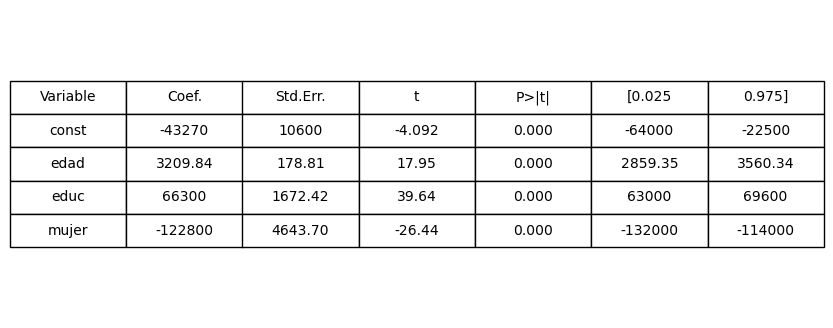

In [95]:
import matplotlib.pyplot as plt

# Convertimos los resultados en tabla
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

# Obtenemos los valores principales del resumen
table_data = [
    ['Variable', 'Coef.', 'Std.Err.', 't', 'P>|t|', '[0.025', '0.975]'],
    ['const', '-43270', '10600', '-4.092', '0.000', '-64000', '-22500'],
    ['edad', '3209.84', '178.81', '17.95', '0.000', '2859.35', '3560.34'],
    ['educ', '66300', '1672.42', '39.64', '0.000', '63000', '69600'],
    ['mujer', '-122800', '4643.70', '-26.44', '0.000', '-132000', '-114000']
]

# Dibujamos la tabla
table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.15]*7)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Guardar como imagen
plt.savefig("resultados_regresion.png", bbox_inches='tight')
plt.show()

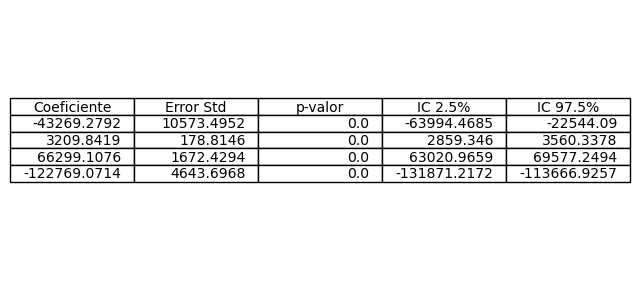

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Extraer coeficientes, errores estándar y p-values
params = modelo.params
conf = modelo.conf_int()
std_err = modelo.bse
pvalues = modelo.pvalues

# Crear DataFrame con resultados
df_result = pd.DataFrame({
    'Coeficiente': params,
    'Error Std': std_err,
    'p-valor': pvalues,
    'IC 2.5%': conf[0],
    'IC 97.5%': conf[1]
})

# Dibujar tabla con matplotlib
fig, ax = plt.subplots(figsize=(8, len(df_result)*0.6 + 1))
ax.axis('tight')
ax.axis('off')
tabla = ax.table(cellText=df_result.round(4).values,
                 colLabels=df_result.columns,
                 loc='center')

plt.savefig('tabla_resultados.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#Parte C. Métodos de Clasificación y Performance